## 1)Importing the Libraries

API Key
mLktDWVuMOC2qh2ZrdaNrwwww

API Key Secret
7KRlr8YBpqER9IrPiugQ9wP6IFDy6caZWd1l8ioWgY9LIIx69L


Bearer Token
AAAAAAAAAAAAAAAAAAAAAMSdjQEAAAAA0S%2FDJP1usZ5hr4qtaRrLqLugm0k%3Dtum0af3K2Ks1oXc27pMOpgaGZuF1WtxD1VEwHgWuRj3AbuVrqY

Access Token
1545415916040720385-GxnjhWzMXghLFkTNnRCFw9Ds6ZggcJ


Access Token Secret
s9DZED2mjPIqJt7lwtxoCtBf9mwOkv8IcaiJkuFNsSzPG


In [1]:
pip install textblob
from textblob import TextBlob

In [2]:
pip install tweepy
import tweepy

In [3]:
import matplotlib.pyplot as plt

## 2)Connecting with the Twitter API

In [29]:
#宝宝这是在我的推特账号创建的一个app， 然后就会生成api，用api就可以让这个code访问到twitter最近的贴文
#所以宝宝必须要开着VPN跑这个code哦

consumer_key = "mLktDWVuMOC2qh2ZrdaNrwwww"
consumer_sercret = "7KRlr8YBpqER9IrPiugQ9wP6IFDy6caZWd1l8ioWgY9LIIx69L"
access_token = "1545415916040720385-GxnjhWzMXghLFkTNnRCFw9Ds6ZggcJ"
access_token_secret = "s9DZED2mjPIqJt7lwtxoCtBf9mwOkv8IcaiJkuFNsSzPG"

In [55]:
auth = tweepy.OAuthHandler(consumer_key, consumer_sercret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

#我在这研究了好久哦，上面的api是上个版本的操作方式，这个版本换成了用client来连接推特服务器
client = tweepy.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAAMSdjQEAAAAA0S%2FDJP1usZ5hr4qtaRrLqLugm0k%3Dtum0af3K2Ks1oXc27pMOpgaGZuF1WtxD1VEwHgWuRj3AbuVrqY')

In [56]:
api

In [119]:
#在这里定义了想要搜索的term和搜索次数哦
#宝宝可以改改这里然后运行code看看结果上的区别！
search_term = "Money Heist"
no_of_tweet = 1000

In [155]:
# tweets = tweepy.Cursor(api.search_tweets, q = search_term).items(no_of_tweet)
# tweets = api.search_tweets(q = search_term).items(no_of_tweet)

#宝宝这里我用了paginator， 用这个就可以让client去在最近的贴文里面找到带有search——term的贴，flatten是用来限制显示多少条找到的贴文，
#宝宝在这里也可以试着改改no_of_tweet， 看看不同数量数据集有什么区别呢
#paginator: 打包搜索到的贴文
#client.search_recent_tweets: 搜索带有term的贴文
tweets = tweepy.Paginator(client.search_recent_tweets, search_term, max_results=100).flatten(limit=no_of_tweet)

In [156]:
tweets

<generator object Paginator.flatten at 0x0000025E2F195648>

## 3)Understand the working of TextBlob

In [ ]:
#宝宝这里就是一些例子啦，用sentiment.polarity来判断sentiment的正负
#大于0就是positive
#小于0就是negative
#等于0就是neutral

In [173]:
a = "I am a bad Circket player"
b = "I am a good player"
c = "I am a Circket player"

In [158]:
TextBlob(a).sentiment.polarity

-0.6999999999999998

In [174]:
TextBlob(b).sentiment.polarity

0.7

In [175]:
TextBlob(c).sentiment.polarity

0.0

## 4)Iterate the data and convert the result in percentage

In [ ]:
#这是我们重点啦，把刚才搜索到的推文全都分析一遍sentiment

In [161]:
positive = 0
negative = 0
neutral  = 0
polarity = 0

In [162]:
for tweet in tweets:    #tweets里包含我们刚才所有搜索到的结果，for就是一条一条的结果，这里每循环一次 tweet就表示当前的贴文
                        #我们一共找了1000条所以这里会一共跑1000次哦
    print(tweet)
    analysis = TextBlob(tweet.text) #.text就是提取帖文中的text部分，不管别的没用的信息
    polarity += analysis.sentiment.polarity
    
    #这里就是分别做统计
    if(analysis.sentiment.polarity == 0):
       neutral += 1

    elif(analysis.sentiment.polarity < 0.00):
       negative += 1

    elif(analysis.sentiment.polarity > 0.00):
       positive += 1

RT @paintingheist: we all need money, right?
when someone offered you millions of dollar but you have to do a heist, which steps you're gon…
🦅American Patriots where is the ⚖️FBI👽Sam Bankman-Fried🕵🏼‍♀️ name fits description funnel money for protection grease many former and present🕵🏼‍♀️politicians👽Dems never refuse💰⚖️FBI hopefully was not paid off in the biggest hustle-heist swindling investors life-savings punishment✔️
@moviemenfes anne with an e, money heist, dll
RT @Aviwe_ii: Name a better series I'll wait

Queen of the south
power
person of interest
breaking bad
money heist
Snowfall
@bigcory00 Bro got paaaaaaiid. Bitch hit easy street. He and his brother going out in Vegas, head buttin cop cars together.  The heist is over. They got their money.
RT @netflixth: นี่คือโปสเตอร์อย่างเป็นทางการ
จาก ‘Money Heist: Korea - Joint Economic Area’ ภาค 2 ที่พร้อมจะระเบิดความเดือดสู่สายตาแฟนๆ ทุก…
@moviemenfes money heist (?)
Dan zuzur aku udah lama jg ngerasa kangen nonton series yg pake bahasa

@moviemenfes Stranger Things
Sex Edu
Money Heist
@SejalSud Watch money heist season
“Money Heist: Korea – Joint Economic Area” Part 2 Unveils Official Posters Ahead Of Release

https://t.co/8d1Cxr0Sor
@vhic_tore Money heist left out.
RT @netflix: Money Heist: Korea - Joint Economic Area Part 2 premieres December 9 https://t.co/mpzlRYUbow
maling duit di percetakan uang RI biar kaya money heist gitu hahaha, terus kalo udah bosen hidup yaudah deh bundir https://t.co/mSk3HMSDXk
@iAryan_Sharma Tu hi nikal le money heist dekhtey hue
RT @SenatorMurray: @lindyli One thing we've learned about Trump is that the explanation for his actions is almost always the simplest, most…
RT @Aviwe_ii: Name a better series I'll wait

Queen of the south
power
person of interest
breaking bad
money heist
Snowfall
RT @nctymisfit: NCT 127 supposed costumes for Halloween 2022

Taeil - Money Heist
Johnny - Flash Slothmore
Taeyong - Nick Wilde
Yuta - Whit…
RT @LuckyHeronSay: Money Heist - I've just finished watching 

@Villain_773 GOT was good until second last episode ,Stranger things started as a kid show but they used 80's era so perfectly tht it's relevant from kids to adults , money heist was okish till second season ..so the award goes for perfect series in all 4 should be.... https://t.co/3uZa41Qu8G
@Villain_773 Money Heist &gt;&gt;&gt;
@ranvijaylive Modi is the professor of "money heist"
RT @uncensoredstuf: Hey it's my first tweet! And here we go with. Present you Itziar Ituño’s nude sex scene from ‘La Casa de Papel’ (aka Mo…
@onlaynsalca Money Heist da parmak izleri için amonyak mı ne kulanmıştı profesör onu hatırladım🤔
@ccmeIon tapi coba aja nonton money heist yang Korean version
@Villain_773 Money heist
@Villain_773 Game of thrones 1 
Money heist 2
Stranger things 3
Dark 4
@Iam_Syedaa Money heist
RT @netflixth: นี่คือโปสเตอร์อย่างเป็นทางการ
จาก ‘Money Heist: Korea - Joint Economic Area’ ภาค 2 ที่พร้อมจะระเบิดความเดือดสู่สายตาแฟนๆ ทุก…
RT @jongseospics: ready for jeon jongseo's serve as to

RT @nctymisfit: NCT 127 supposed costumes for Halloween 2022

Taeil - Money Heist
Johnny - Flash Slothmore
Taeyong - Nick Wilde
Yuta - Whit…
RT @nzr_ka_tika: Money heist is full of quotes, u need to watch it carefully n learn some lessons https://t.co/ciw2YOQ8m2
RT @DullVivid: Sally Furbomb swipes a few gems and the heist takes a turn for the worse as she realizes ordering catsuits off Wish is the w…
RT @nctymisfit: NCT 127 supposed costumes for Halloween 2022

Taeil - Money Heist
Johnny - Flash Slothmore
Taeyong - Nick Wilde
Yuta - Whit…
@ryandkelley1 Kinda like the money heist where you beg for money to cover legal fees?
@lindyli One thing we've learned about Trump is that the explanation for his actions is almost always the simplest, most serving possibility. 

With all of that Saudi money flowing in his direction, the odds are very high that Trump's document heist was on behalf of the Saudis.
RT @nctymisfit: NCT 127 supposed costumes for Halloween 2022

Taeil - Money Heist
Johnny -

RT @nctymisfit: NCT 127 supposed costumes for Halloween 2022

Taeil - Money Heist
Johnny - Flash Slothmore
Taeyong - Nick Wilde
Yuta - Whit…
RT @nctymisfit: NCT 127 supposed costumes for Halloween 2022

Taeil - Money Heist
Johnny - Flash Slothmore
Taeyong - Nick Wilde
Yuta - Whit…
RT @nctymisfit: NCT 127 supposed costumes for Halloween 2022

Taeil - Money Heist
Johnny - Flash Slothmore
Taeyong - Nick Wilde
Yuta - Whit…
RT @nctymisfit: NCT 127 supposed costumes for Halloween 2022

Taeil - Money Heist
Johnny - Flash Slothmore
Taeyong - Nick Wilde
Yuta - Whit…
RT @nctymisfit: NCT 127 supposed costumes for Halloween 2022

Taeil - Money Heist
Johnny - Flash Slothmore
Taeyong - Nick Wilde
Yuta - Whit…
@Villain_773 Money heist 
Kyuki yahi dekhi h, mast h.
If you ever feel useless, just remember tgat there are people whose fav show is money heist
RT @nctymisfit: NCT 127 supposed costumes for Halloween 2022

Taeil - Money Heist
Johnny - Flash Slothmore
Taeyong - Nick Wilde
Yuta - Whit…
RT @netf

RT @Aviwe_ii: Name a better series I'll wait

Queen of the south
power
person of interest
breaking bad
money heist
Snowfall
RT @nctymisfit: NCT 127 supposed costumes for Halloween 2022

Taeil - Money Heist
Johnny - Flash Slothmore
Taeyong - Nick Wilde
Yuta - Whit…
RT @Aviwe_ii: Name a better series I'll wait

Queen of the south
power
person of interest
breaking bad
money heist
Snowfall
@aimen_mughll Money heist?
RT @nctymisfit: NCT 127 supposed costumes for Halloween 2022

Taeil - Money Heist
Johnny - Flash Slothmore
Taeyong - Nick Wilde
Yuta - Whit…
RT @oldschoolboy29: Steal it, snatch it, that how it work 
Series- Money heist https://t.co/uOVYIxzCc3
RT @nctymisfit: NCT 127 supposed costumes for Halloween 2022

Taeil - Money Heist
Johnny - Flash Slothmore
Taeyong - Nick Wilde
Yuta - Whit…
TAEIL AS MONEY HEIST OMG https://t.co/roz9pLYOBh
@karthick77keyan @its_brunorex @aravinth43AK money heist copy🤣
RT @netflixth: นี่คือโปสเตอร์อย่างเป็นทางการ
จาก ‘Money Heist: Korea - Joint Economic A

@_malaaay Definitely ! &amp; Money Heist !
RT @nctymisfit: NCT 127 supposed costumes for Halloween 2022

Taeil - Money Heist
Johnny - Flash Slothmore
Taeyong - Nick Wilde
Yuta - Whit…
Watch: Money Heist: Korea - Joint Economic Area (2022) Full Movie &amp; Most Populer Movies and Tv Shows [Streaming &amp; Download Bluray]
https://t.co/iXvJzBPNpL https://t.co/GZoNayvVeL
Jeon Jong Seo, Park Hae Soo, Lee Hyun Woo, And More Are Desperate To Escape The Counterattack In “Money Heist: Korea” Part 2 Posters - https://t.co/cWTNaL9JQJ https://t.co/ArrKTDKqnZ
RT @netflixth: นี่คือโปสเตอร์อย่างเป็นทางการ
จาก ‘Money Heist: Korea - Joint Economic Area’ ภาค 2 ที่พร้อมจะระเบิดความเดือดสู่สายตาแฟนๆ ทุก…
RT @Aviwe_ii: Name a better series I'll wait

Queen of the south
power
person of interest
breaking bad
money heist
Snowfall
@Jainshrasti24 Money heist aur stranger Things dekho acchi aur simple bhi hai
RT @nctymisfit: NCT 127 supposed costumes for Halloween 2022

Taeil - Money Heist
Johnny - Flash Slothm

Can't believe the main villain of Flower of Evil is one of the best characters in Money Heist Korea 😭 Like dbdjsjsjjs he's so different
RT @nctymisfit: NCT 127 supposed costumes for Halloween 2022

Taeil - Money Heist
Johnny - Flash Slothmore
Taeyong - Nick Wilde
Yuta - Whit…
@atrupar Translation: I scammed enough money in my first nepotistic heist.
RT @nctymisfit: NCT 127 supposed costumes for Halloween 2022

Taeil - Money Heist
Johnny - Flash Slothmore
Taeyong - Nick Wilde
Yuta - Whit…
RT @nctymisfit: NCT 127 supposed costumes for Halloween 2022

Taeil - Money Heist
Johnny - Flash Slothmore
Taeyong - Nick Wilde
Yuta - Whit…
@Kalidas96565086 @Vasant_1993 @Its_Visalavathi @RedRajesh_08 @Thala_Sanjay420 @SINCE_2_0_0_1 @trichy_cinemas @SriSathi6 Ada kiruku kuthi RG thanda red giant nu avarum solirukaru ada kumutta punda brother ivanuku kita poi shortcut la sonna ena puriyim AK ali kuthi nu tha ninaipanga pola dei distribution Red Giant thanu avaru solirikaru ni un pundaiya sathitu kilaba

RT @nctymisfit: NCT 127 supposed costumes for Halloween 2022

Taeil - Money Heist
Johnny - Flash Slothmore
Taeyong - Nick Wilde
Yuta - Whit…
nonton money heist korea duluan tuh sebuah kesalahan kah? soalnya pas nonton yang ori malah jd boring banget, terus kek yahh akskskk. tp emg yg korea alurnya lebih clean gak si
RT @netflixth: นี่คือโปสเตอร์อย่างเป็นทางการ
จาก ‘Money Heist: Korea - Joint Economic Area’ ภาค 2 ที่พร้อมจะระเบิดความเดือดสู่สายตาแฟนๆ ทุก…
Money Heist: Korea - Joint Economic Area (2022)

tempat yg tidak adil dengan sistem kapitalisme yg berjalan. Profesor pun mengumpulkan sekelompok pencuri lihai yg memiliki visi dan misi yg sama. Nama para pencuri ini diambil dari nama kota, seperti Tokyo, Denver, hingga Berlin. https://t.co/sPXciSJFHi
RT @nctymisfit: NCT 127 supposed costumes for Halloween 2022

Taeil - Money Heist
Johnny - Flash Slothmore
Taeyong - Nick Wilde
Yuta - Whit…
RT @netflixth: นี่คือโปสเตอร์อย่างเป็นทางการ
จาก ‘Money Heist: Korea - Joint Economic Area’ ภาค 2

RT @netflixth: นี่คือโปสเตอร์อย่างเป็นทางการ
จาก ‘Money Heist: Korea - Joint Economic Area’ ภาค 2 ที่พร้อมจะระเบิดความเดือดสู่สายตาแฟนๆ ทุก…
#MoneyHeistKorea Part 2 Unfolds Group’s Strategic Escape + Introduces New Character

https://t.co/QU74mIpu0R
RT @netflixth: นี่คือโปสเตอร์อย่างเป็นทางการ
จาก ‘Money Heist: Korea - Joint Economic Area’ ภาค 2 ที่พร้อมจะระเบิดความเดือดสู่สายตาแฟนๆ ทุก…
RT @netflixth: นี่คือโปสเตอร์อย่างเป็นทางการ
จาก ‘Money Heist: Korea - Joint Economic Area’ ภาค 2 ที่พร้อมจะระเบิดความเดือดสู่สายตาแฟนๆ ทุก…
RT @nctymisfit: NCT 127 supposed costumes for Halloween 2022

Taeil - Money Heist
Johnny - Flash Slothmore
Taeyong - Nick Wilde
Yuta - Whit…
RT @nctymisfit: NCT 127 supposed costumes for Halloween 2022

Taeil - Money Heist
Johnny - Flash Slothmore
Taeyong - Nick Wilde
Yuta - Whit…
RT @nctymisfit: NCT 127 supposed costumes for Halloween 2022

Taeil - Money Heist
Johnny - Flash Slothmore
Taeyong - Nick Wilde
Yuta - Whit…
RT @netflixth: นี่คือโปสเตอร์อย่างเป็นทางการ


RT @nctymisfit: NCT 127 supposed costumes for Halloween 2022

Taeil - Money Heist
Johnny - Flash Slothmore
Taeyong - Nick Wilde
Yuta - Whit…
RT @NetflixID: Udah nggak sabar untuk ngikutin rencana Professor dkk biar aksi pencuriannya lancar jaya? Tungguin, Money Heist: Korea - Joi…
RT @nctymisfit: NCT 127 supposed costumes for Halloween 2022

Taeil - Money Heist
Johnny - Flash Slothmore
Taeyong - Nick Wilde
Yuta - Whit…
RT @netflixth: นี่คือโปสเตอร์อย่างเป็นทางการ
จาก ‘Money Heist: Korea - Joint Economic Area’ ภาค 2 ที่พร้อมจะระเบิดความเดือดสู่สายตาแฟนๆ ทุก…
RT @nctymisfit: NCT 127 supposed costumes for Halloween 2022

Taeil - Money Heist
Johnny - Flash Slothmore
Taeyong - Nick Wilde
Yuta - Whit…


In [163]:
positive

247

In [164]:
negative

162

In [165]:
neutral

591

In [166]:
polarity

37.55943109668104

In [167]:
# Define a function to calculate the percentage
#这里就是算一下positive negative neutral分别占比多少啦
def percentage(part, whole):
    return 100 * float(part)/float(whole)

In [168]:
positive = percentage(positive, no_of_tweet)
negative = percentage(negative, no_of_tweet)
neutral  = percentage(neutral, no_of_tweet)
polarity  = percentage(polarity, no_of_tweet)

In [169]:
#宝宝这里就是限制到小数点后两位
positive = format(positive, '.2f')
negative = format(negative, '.2f')
neutral = format(neutral, '.2f')

In [170]:
print("Reaction of the people on " + search_term + 
      " By analyzing " + str(no_of_tweet) + " Tweets ")

if (polarity == 0):
    print(" is 'Neutral'")
    
elif (polarity < 0.00):
    print("is 'Negative'")
    
elif (polarity > 0.00):
    print("is 'Positive'")

Reaction of the people on Money Heist By analyzing 1000 Tweets 
is 'Positive'


## Getting the result of the Analysis

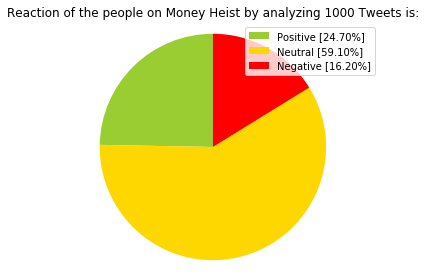

In [172]:
labels = ['Positive ['+str(positive)+'%]', 
          'Neutral ['+str(neutral)+'%]', 
          'Negative ['+str(negative)+'%]']

sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'gold', 'red']

patches, texts = plt.pie(sizes, colors = colors, startangle = 90)
plt.legend(patches, labels, loc = "best")
plt.title('Reaction of the people on '
          + search_term +' by analyzing '
          + str(no_of_tweet) +' Tweets is:')
plt.axis('equal')
plt.tight_layout()
plt.show()